<a href="https://colab.research.google.com/github/minchillo4/sales_proj/blob/main/superstore_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING FILES


In [ ]:
from google.colab import files
import sqlite3
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
uploaded = files.upload()

Saving superstore_dataset.csv to superstore_dataset.csv


In [ ]:
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [ ]:
df = pd.read_csv("superstore_dataset.csv", encoding="latin-1") ## Criando o dataframe inicial
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


Transformar nossas colunas Order Date e Ship Date em colunas de data.

Com o dataframe em mãos, podemos analisar a estrutura de seus dados.

In [ ]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


Checar por valores duplicados

In [ ]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


Vamos selecionar a a coluna ROW ID como índice do dataframe, assim ela também terá essa função dentro do SQL.

In [ ]:
df.set_index('Row ID', inplace=True)


In [ ]:
df.isna().any()

Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [ ]:
df.to_csv('/content/drive/My Drive/mydata.csv', index=False)

Para garantir uma correspondência precisa entre os tipos de dados em meu DataFrame e os tipos de dados em minha tabela SQLite, estou criando um dicionário que mapeia o nome de cada coluna aos seus respectivos tipos de dados. Isso garantirá consistência e precisão ao inserir os dados do DataFrame na tabela do banco de dados.

In [ ]:
column_types = {
    'Order_ID': 'TEXT',
    'Order_Date': 'DATE',   # Change to DATE type
    'Ship_Date': 'DATE',    # Change to DATE type
    'Ship_Mode': 'TEXT',
    'Customer_ID': 'TEXT',
    'Customer_Name': 'TEXT',
    'Segment': 'TEXT',
    'Country': 'TEXT',
    'City': 'TEXT',
    'State': 'TEXT',
    'Postal_Code': 'INTEGER',
    'Region': 'TEXT',
    'Product_ID': 'TEXT',
    'Category': 'TEXT',
    'Sub_Category': 'TEXT',
    'Product_Name': 'TEXT',
    'Sales': 'REAL',
    'Quantity': 'INTEGER',
    'Discount': 'REAL',
    'Profit': 'REAL'
}

Podemeos adicionar os dados para o banco de dados SQLite, usando o dicionário column_types para especificar os tipos e selecionando a coluna Row_ID como índice.

In [ ]:
df.to_sql('Superstore', conn, if_exists='replace', index=True, index_label='Row_ID',dtype=column_types)

9994

In [ ]:
conn.commit() ## Commiting the current transaction.

Após inserirmos nossos dados no banco de dados, podemos agora analisar o esquema da tabela. O esquema nos fornece uma visão estruturada dos diferentes elementos que compõem a tabela, como os nomes das colunas, os tipos de dados que cada coluna pode armazenar e quaisquer restrições ou índices aplicados a essas colunas

In [ ]:
schema_query = "PRAGMA table_info(Superstore)"

# Execute the query
cursor.execute(schema_query)

# Fetch all the results
schema = cursor.fetchall()

# Print the schema
for column in schema:
    print(column)


(0, 'Row_ID', 'INTEGER', 0, None, 0)
(1, 'Order ID', 'TEXT', 0, None, 0)
(2, 'Order Date', 'TIMESTAMP', 0, None, 0)
(3, 'Ship Date', 'TIMESTAMP', 0, None, 0)
(4, 'Ship Mode', 'TEXT', 0, None, 0)
(5, 'Customer ID', 'TEXT', 0, None, 0)
(6, 'Customer Name', 'TEXT', 0, None, 0)
(7, 'Segment', 'TEXT', 0, None, 0)
(8, 'Country', 'TEXT', 0, None, 0)
(9, 'City', 'TEXT', 0, None, 0)
(10, 'State', 'TEXT', 0, None, 0)
(11, 'Postal Code', 'INTEGER', 0, None, 0)
(12, 'Region', 'TEXT', 0, None, 0)
(13, 'Product ID', 'TEXT', 0, None, 0)
(14, 'Category', 'TEXT', 0, None, 0)
(15, 'Sub-Category', 'TEXT', 0, None, 0)
(16, 'Product Name', 'TEXT', 0, None, 0)
(17, 'Sales', 'REAL', 0, None, 0)
(18, 'Quantity', 'INTEGER', 0, None, 0)
(19, 'Discount', 'REAL', 0, None, 0)
(20, 'Profit', 'REAL', 0, None, 0)


Para auxiliar com a execução das queries, vamos criar a função query_executer. Essa função tem a responsabilidade de executar uma consulta SQL no banco de dados e converter o resultado em um DataFrame do Pandas, facilitando a análise e manipulação dos dados.

In [ ]:
def query_executer(query):
  cursor.execute(query)
  schema = cursor.fetchall()
  columns = [col[0] for col in cursor.description]
  df = pd.DataFrame(schema,columns=columns)
  return df



Após carregar nossos dados banco, podemos solicitar as primeiras cinco linhas da nossa tabela para verificar o sucesso da importação

In [ ]:
query = '''SELECT *
FROM superstore
LIMIT 5;'''

# Execute the query
result = query_executer(query)
result

,Row_ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Queries
### Podemos começar a fazer queries para estudar nossos dados e fornecer insights para a área de negócios.

### Quanto foi o total de vendas e lucro por ano?



In [ ]:
query = '''SELECT STRFTIME('%Y', "Order Date") AS year,
SUM(Sales) AS total_sales,
SUM(Profit) AS total_profit
FROM Superstore
GROUP BY year
ORDER BY year ASC;'''m

result = query_executer(query)
result

,year,total_sales,total_profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


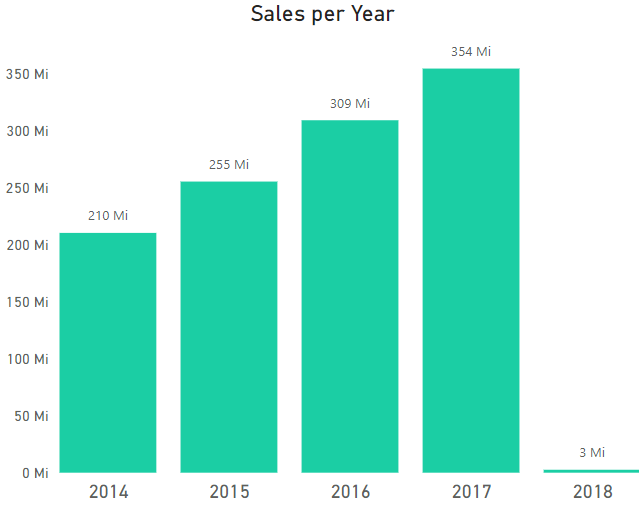

### Quanto foi o total de vendas e lucro por trimestre

In [ ]:
query = '''SELECT
  STRFTIME('%Y', "Order Date") AS year,
  CASE
    WHEN STRFTIME('%m', "Order Date") IN ('01','02','03') THEN 'Q1'
    WHEN STRFTIME('%m', "Order Date") IN ('04','05','06') THEN 'Q2'
    WHEN STRFTIME('%m', "Order Date") IN ('07','08','09') THEN 'Q3'
    ELSE 'Q4'
  END AS quarter,
  SUM(Sales) AS total_sales,
  SUM(Profit) AS total_profit
FROM Superstore
GROUP BY year, quarter
ORDER BY year, quarter;
'''

result = query_executer(query)
result

,year,quarter,total_sales,total_profit
0,2014,Q1,74447.7960,3811.2290
1,2014,Q2,86538.7596,11204.0692
2,2014,Q3,143633.2123,12804.7218
3,2014,Q4,179627.7302,21723.9541
4,2015,Q1,68851.7386,9264.9416
5,2015,Q2,89124.1870,12190.9224
6,2015,Q3,130259.5752,16853.6194
7,2015,Q4,182297.0082,23309.1203
8,2016,Q1,93237.1810,11441.3708
9,2016,Q2,136082.3010,16390.3394


In [ ]:
query = '''SELECT
  quarter,
  SUM(total_sales) AS total_sales,
  SUM(total_profit) AS total_profit
FROM (
    SELECT
      CASE
        WHEN STRFTIME('%m', "Order Date") IN ('01','02','03') THEN 'Q1'
        WHEN STRFTIME('%m', "Order Date") IN ('04','05','06') THEN 'Q2'
        WHEN STRFTIME('%m', "Order Date") IN ('07','08','09') THEN 'Q3'
        ELSE 'Q4'
      END AS quarter,
      SUM(Sales) AS total_sales,
      SUM(Profit) AS total_profit
    FROM Superstore
    GROUP BY quarter
) AS quarters
GROUP BY quarter
ORDER BY quarter;
'''
result = query_executer(query)
result

,quarter,total_sales,total_profit
0,Q1,359681.5758,48023.7440
1,Q2,445509.6196,55284.5395
2,Q3,613932.1057,72467.0785
3,Q4,878077.5592,110621.6597


### Quais regiões que mais vendem e lucram?

 What region generates the highest sales and profits ?

In [ ]:
query='''SELECT region, SUM(sales) AS total_sales, SUM(profit) AS total_profits
FROM superstore
GROUP BY region
ORDER BY total_profits DESC;'''

result = query_executer(query)
result

,Region,total_sales,total_profits
0,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,Central,501239.8908,39706.3625


In [ ]:
query='''SELECT region, ROUND((SUM(profit) / SUM(sales)) * 100, 2) as profit_margin
FROM superstore
GROUP BY region
ORDER BY profit_margin DESC'''


result = query_executer(query)

result

,Region,profit_margin
0,West,14.94
1,East,13.48
2,South,11.93
3,Central,7.92


### Quais cidades e estados que trazem as maiores vendas e lucros?

In [ ]:
query='''SELECT State, SUM(Sales) as Total_Sales, SUM(Profit) as Total_Profits, ROUND((SUM(profit) / SUM(sales)) * 100, 2) as profit_margin
FROM superstore
GROUP BY State
ORDER BY Total_Profits DESC
LIMIT 10;'''


result = query_executer(query)

result

,State,Total_Sales,Total_Profits,profit_margin
0,California,457687.6315,76381.3871,16.69
1,New York,310876.2710,74038.5486,23.82
2,Washington,138641.2700,33402.6517,24.09
3,Michigan,76269.6140,24463.1876,32.07
4,Virginia,70636.7200,18597.9504,26.33
5,Indiana,53555.3600,18382.9363,34.33
6,Georgia,49095.8400,16250.0433,33.10
7,Kentucky,36591.7500,11199.6966,30.61
8,Minnesota,29863.1500,10823.1874,36.24
9,Delaware,27451.0690,9977.3748,36.35


### Quais foram os estados com as piores margens de lucro?

In [ ]:
query='''SELECT State, SUM(Sales) as Total_Sales, SUM(Profit) as Total_Profits
FROM superstore
GROUP BY State
ORDER BY Total_Profits ASC
LIMIT 10;'''

result = query_executer(query)

result

,State,Total_Sales,Total_Profits
0,Texas,170188.0458,-25729.3563
1,Ohio,78258.1360,-16971.3766
2,Pennsylvania,116511.9140,-15559.9603
3,Illinois,80166.1010,-12607.8870
4,North Carolina,55603.1640,-7490.9122
5,Colorado,32108.1180,-6527.8579
6,Tennessee,30661.8730,-5341.6936
7,Arizona,35282.0010,-3427.9246
8,Florida,89473.7080,-3399.3017
9,Oregon,17431.1500,-1190.4705


### Quais categorias de produto foram mais impactadas por descontos?

In [ ]:
query='''SELECT category, SUM(sales) AS total_sales, SUM(profit) AS total_profit, ROUND(SUM(profit)/SUM(sales)*100, 2) AS profit_margin
FROM superstore
GROUP BY category
ORDER BY total_profit DESC;'''

result =query_executer(query)
result

,Category,total_sales,total_profit,profit_margin
0,Technology,836154.0330,145454.9481,17.40
1,Office Supplies,719047.0320,122490.8008,17.04
2,Furniture,741999.7953,18451.2728,2.49


### Quais foram as subcategorias de produtos que mais impactadas por descontos?

In [ ]:
query='''SELECT category, "Sub-Category", SUM(discount) AS total_discount
FROM superstore
GROUP BY category, "Sub-Category"
ORDER BY total_discount DESC;'''

result =query_executer(query)
result

,Category,Sub-Category,total_discount
0,Office Supplies,Binders,567.00
1,Technology,Phones,137.40
2,Furniture,Furnishings,132.40
3,Furniture,Chairs,105.00
4,Office Supplies,Paper,102.60
5,Furniture,Tables,83.35
6,Office Supplies,Appliances,77.60
7,Office Supplies,Storage,63.20
8,Technology,Accessories,60.80
9,Office Supplies,Art,59.60


### Quais categorias de produto trouxeram as maiores vendas, lucro e margem de lucro?

In [ ]:
query='''SELECT category, SUM(sales) AS total_sales, SUM(profit) AS total_profit, ROUND(SUM(profit)/SUM(sales)*100, 2) AS profit_margin
FROM superstore
GROUP BY category
ORDER BY total_profit DESC;'''

result =query_executer(query)
result

,Category,total_sales,total_profit,profit_margin
0,Technology,836154.0330,145454.9481,17.40
1,Office Supplies,719047.0320,122490.8008,17.04
2,Furniture,741999.7953,18451.2728,2.49


### Quais foram as categorias que trouxeram mais lucro em cada estado?

In [ ]:
query='''SELECT state, category, SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY state, category
ORDER BY total_profit DESC
LIMIT 20;'''

result =query_executer(query)
result

,State,Category,total_sales,total_profit
0,New York,Technology,127483.5000,42186.7856
1,California,Office Supplies,142351.9480,37748.3847
2,California,Technology,159271.0820,29470.0368
3,New York,Office Supplies,90020.0420,25994.0829
4,Washington,Technology,50536.7100,15019.3435
5,Michigan,Office Supplies,37723.7590,15005.3335
6,Washington,Office Supplies,40084.4080,11189.5232
7,Indiana,Technology,26323.2500,11000.8773
8,Georgia,Office Supplies,26715.8100,9800.9256
9,California,Furniture,156064.6015,9162.9656


### Quais foram as categorias que menos lucraram em cada estado?

In [ ]:
query='''SELECT state, category, SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY state, category
ORDER BY total_profit ASC
LIMIT 20;'''

result =query_executer(query)
result

,State,Category,total_sales,total_profit
0,Texas,Office Supplies,44490.5300,-18584.6434
1,Ohio,Technology,35675.9920,-12649.9401
2,Texas,Furniture,60593.2918,-10436.1419
3,Illinois,Furniture,28274.5220,-9076.2894
4,Illinois,Office Supplies,19907.9060,-8354.1568
5,Pennsylvania,Furniture,39354.9310,-7196.7199
6,Pennsylvania,Office Supplies,34941.7140,-5172.0188
7,Ohio,Furniture,24199.1450,-4206.3212
8,North Carolina,Technology,26083.1190,-3583.3040
9,North Carolina,Furniture,15155.4840,-3486.4633


### Quais foram as subcategorias de produtos que mais vendaram e lucraram em cada região e estado?

In [ ]:
query='''SELECT "Sub-Category", SUM(sales) AS total_sales, SUM(profit) AS total_profit, ROUND(SUM(profit)/SUM(sales)*100, 2) AS profit_margin
FROM superstore
GROUP BY "Sub-Category"
ORDER BY total_profit DESC;'''

result =query_executer(query)
result


,Sub-Category,total_sales,total_profit,profit_margin
0,Copiers,149528.0300,55617.8249,37.20
1,Phones,330007.0540,44515.7306,13.49
2,Accessories,167380.3180,41936.6357,25.05
3,Paper,78479.2060,34053.5693,43.39
4,Binders,203412.7330,30221.7633,14.86
5,Chairs,328449.1030,26590.1663,8.10
6,Storage,223843.6080,21278.8264,9.51
7,Appliances,107532.1610,18138.0054,16.87
8,Furnishings,91705.1640,13059.1436,14.24
9,Envelopes,16476.4020,6964.1767,42.27


In [ ]:
query='''SELECT region, "Sub-Category", SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY region, "Sub-Category"
ORDER BY total_profit DESC
LIMIT 30;'''

result =query_executer(query)
result


,Region,Sub-Category,total_sales,total_profit
0,West,Copiers,49749.242,19327.2351
1,East,Copiers,53219.462,17022.8418
2,West,Accessories,61114.116,16484.5983
3,West,Binders,55961.113,16096.8016
4,Central,Copiers,37259.570,15608.8413
5,Central,Phones,72403.282,12323.0267
6,East,Phones,100614.982,12314.6860
7,West,Paper,26663.718,12119.2364
8,East,Binders,53497.997,11267.9346
9,East,Accessories,45033.372,11195.8644


### Quais foram as subcategorias de produtos que menos lucraram em cada região e estado?

In [ ]:
query='''SELECT region, "Sub-Category", SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY region, "Sub-Category"
ORDER BY total_profit ASC
LIMIT 30;'''

result =query_executer(query)
result


,Region,Sub-Category,total_sales,total_profit
0,East,Tables,39139.8070,-11025.3801
1,South,Tables,43916.1920,-4623.0579
2,Central,Furnishings,15254.3700,-3906.2168
3,Central,Tables,39154.9710,-3559.6504
4,Central,Appliances,23582.0330,-2638.6175
5,Central,Bookcases,24157.1768,-1997.9043
6,West,Bookcases,36004.1235,-1646.5117
7,Central,Machines,26797.3840,-1486.0666
8,South,Machines,53890.9600,-1438.8930
9,East,Bookcases,43819.3340,-1167.6318


### Quais foram as subcategorias com as maiores vendas/lucros em cada região e estado?

In [ ]:
query='''SELECT region, "Sub-Category", SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY region, "Sub-Category"
ORDER BY total_profit DESC
LIMIT 20;'''

result =query_executer(query)
result

,Region,Sub-Category,total_sales,total_profit
0,West,Copiers,49749.242,19327.2351
1,East,Copiers,53219.462,17022.8418
2,West,Accessories,61114.116,16484.5983
3,West,Binders,55961.113,16096.8016
4,Central,Copiers,37259.570,15608.8413
5,Central,Phones,72403.282,12323.0267
6,East,Phones,100614.982,12314.6860
7,West,Paper,26663.718,12119.2364
8,East,Binders,53497.997,11267.9346
9,East,Accessories,45033.372,11195.8644


### Quais foram as subcategorias com os menores vendas/lucros em cada região e estado?

In [ ]:
query='''SELECT region, "Sub-Category", SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY region, "Sub-Category"
ORDER BY total_profit ASC
LIMIT 20;'''

result =query_executer(query)
result

,Region,Sub-Category,total_sales,total_profit
0,East,Tables,39139.8070,-11025.3801
1,South,Tables,43916.1920,-4623.0579
2,Central,Furnishings,15254.3700,-3906.2168
3,Central,Tables,39154.9710,-3559.6504
4,Central,Appliances,23582.0330,-2638.6175
5,Central,Bookcases,24157.1768,-1997.9043
6,West,Bookcases,36004.1235,-1646.5117
7,Central,Machines,26797.3840,-1486.0666
8,South,Machines,53890.9600,-1438.8930
9,East,Bookcases,43819.3340,-1167.6318


### Quais são os produtos mais lucrativos?

In [ ]:
query='''SELECT "Product Name", SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY "Product Name"
ORDER BY total_profit DESC;'''

result =query_executer(query)
result


,Product Name,total_sales,total_profit
0,Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836
3,Canon PC1060 Personal Laser Copier,11619.834,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,4094.9766
...,...,...,...
1845,Bush Advantage Collection Racetrack Conference...,9544.725,-1934.3976
1846,Chromcraft Bull-Nose Wood Oval Conference Tabl...,9917.640,-2876.1156
1847,Cubify CubeX 3D Printer Triple Head Print,7999.980,-3839.9904
1848,Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4589.9730


### Quais são os produtos menos lucrativos?

In [ ]:
query='''SELECT "Product Name", SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY "Product Name"
ORDER BY total_profit ASC;'''

result =query_executer(query)
result


,Product Name,total_sales,total_profit
0,Cubify CubeX 3D Printer Double Head Print,11099.963,-8879.9704
1,Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4589.9730
2,Cubify CubeX 3D Printer Triple Head Print,7999.980,-3839.9904
3,Chromcraft Bull-Nose Wood Oval Conference Tabl...,9917.640,-2876.1156
4,Bush Advantage Collection Racetrack Conference...,9544.725,-1934.3976
...,...,...,...
1845,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,4094.9766
1846,Canon PC1060 Personal Laser Copier,11619.834,4570.9347
1847,Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836
1848,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7753.0390


### Quais segmentos de produtos com maior lucro e vendas?

In [ ]:
query='''SELECT segment, SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM superstore
GROUP BY segment
ORDER BY total_profit DESC;'''

result =query_executer(query)
result

,Segment,total_sales,total_profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


### Qual é o número total de clientes?

In [ ]:
query='''SELECT COUNT(DISTINCT "Customer ID") AS total_customers
FROM superstore;'''

result =query_executer(query)
result

,total_customers
0,793


### Quantos clientes existem por região?

In [ ]:
query='''SELECT region, COUNT(DISTINCT "Customer ID") AS total_customers
FROM superstore
GROUP BY region
ORDER BY total_customers DESC;'''

result =query_executer(query)
result



,Region,total_customers
0,West,686
1,East,674
2,Central,629
3,South,512


### Quais são os clientes mais leais?

In [ ]:

query='''SELECT "Customer ID",
SUM(sales) AS total_sales,
SUM(profit) AS total_profit
FROM superstore
GROUP BY "Customer ID"
ORDER BY total_sales DESC
LIMIT 15;'''

result =query_executer(query)
result





,Customer ID,total_sales,total_profit
0,SM-20320,25043.050,-1980.7393
1,TC-20980,19052.218,8981.3239
2,RB-19360,15117.339,6976.0959
3,TA-21385,14595.620,4703.7883
4,AB-10105,14473.571,5444.8055
5,KL-16645,14175.229,806.8550
6,SC-20095,14142.334,5757.4119
7,HL-15040,12873.298,5622.4292
8,SE-20110,12209.438,2650.6769
9,CC-12370,12129.072,2177.0493


### Qual o tempo de entrega  médio (em horas) de cada compra?

In [ ]:
query = '''
SELECT AVG(("Ship Date" - "Order Date") * 24) AS avg_shipping_time_hours
FROM superstore;
'''
result =query_executer(query)
result

,avg_shipping_time_hours
0,0.365019


K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.